# Mean-Variance Analysis and the Sharpe Ratio

---

# Getting started

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

> __Get the return data set__
- Its the log return of 6 instruments.
    - Basically, its the same instruments, but with different proparties. this is for ilustrate different scenario of risk and return.

__GBP_USD__: Long Position in GBP (denominated in USD) <br>
__USD_GBP__: Short Position in GBP (== Long Position in USD; denominated in GBP) <br>
__Levered__: USD_GBP with Leverage ("Trading USD_GBP on Margin") <br>
__Neutral__: Neutral Positions only (no Investments / Trades)  <br>
__Low_Vol__: Active Strategy for USD_GBP with Long, Short and Neutral Positions <br>
__Random__: Random "Strategy" for USD_GBP with random Long, Short and Neutral Positions

In [3]:
returns = pd.read_csv("../Data/returns.csv", index_col = "Date", parse_dates = ["Date"])
returns

,GBP_USD,USD_GBP,Levered,Low_Vol,Random,Neutral
Date,,,,,,
2010-01-02,-0.002733,0.002733,0.006275,0.0,0.002733,0
2010-01-03,-0.001727,0.001727,0.003967,0.0,0.000000,0
2010-01-04,-0.005786,0.005786,0.013259,0.0,0.005786,0
2010-01-05,0.001687,-0.001687,-0.003884,0.0,0.001687,0
2010-01-06,-0.005446,0.005446,0.012482,0.0,0.005446,0
...,...,...,...,...,...,...
2020-12-23,0.005004,-0.005004,-0.011548,0.0,-0.005004,0
2020-12-27,-0.008278,0.008278,0.018937,0.0,-0.008278,0
2020-12-28,0.003799,-0.003799,-0.008760,0.0,-0.003799,0


In [4]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3139 entries, 2010-01-02 to 2020-12-30
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GBP_USD  3139 non-null   float64
 1   USD_GBP  3139 non-null   float64
 2   Levered  3139 non-null   float64
 3   Low_Vol  3139 non-null   float64
 4   Random   3139 non-null   float64
 5   Neutral  3139 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 171.7 KB


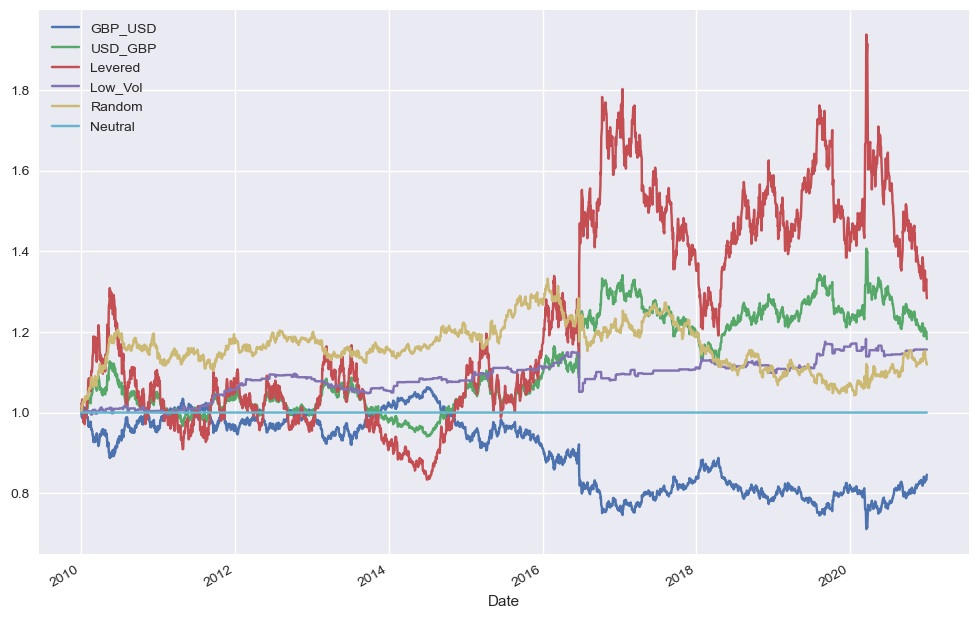

In [5]:
# Plot all the instruments.
returns.cumsum().apply(np.exp).plot(figsize = (12, 8))
plt.show()

# You can see how different properties can effect on 
# the behavior of the instrument.

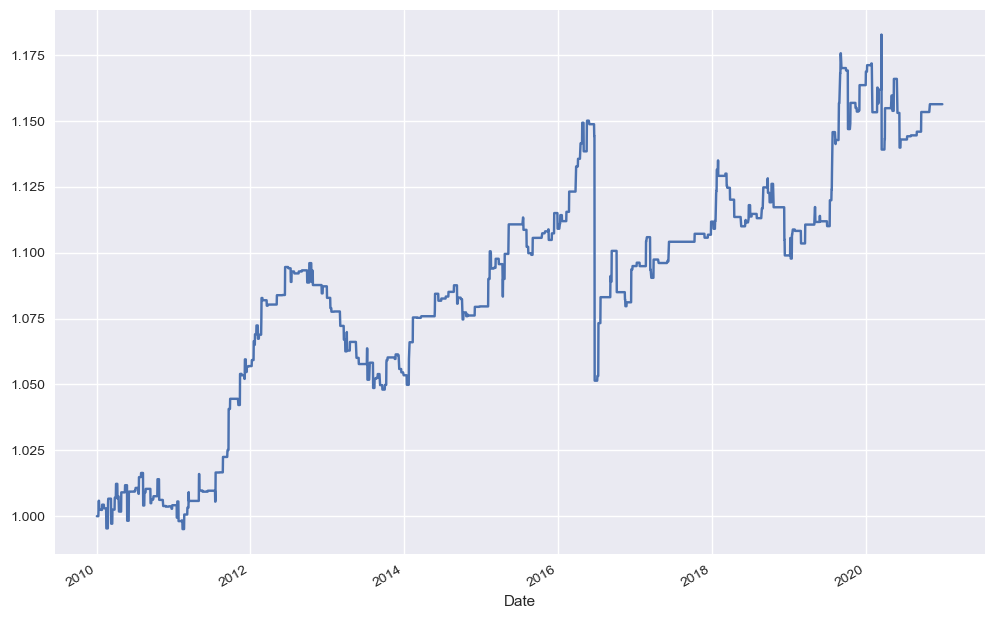

In [6]:
# Analys the Low volatility strategy 
# we plot the cumelative return over time. 
returns.Low_Vol.cumsum().apply(np.exp).plot(figsize = (12, 8))
plt.show()

In [35]:
returns.Low_Vol.value_counts()

Low_Vol
 0.000000    2826
-0.001950       1
 0.001149       1
 0.011488       1
 0.001376       1
             ... 
 0.002467       1
-0.002912       1
-0.005013       1
 0.003929       1
 0.002567       1
Name: count, Length: 314, dtype: int64

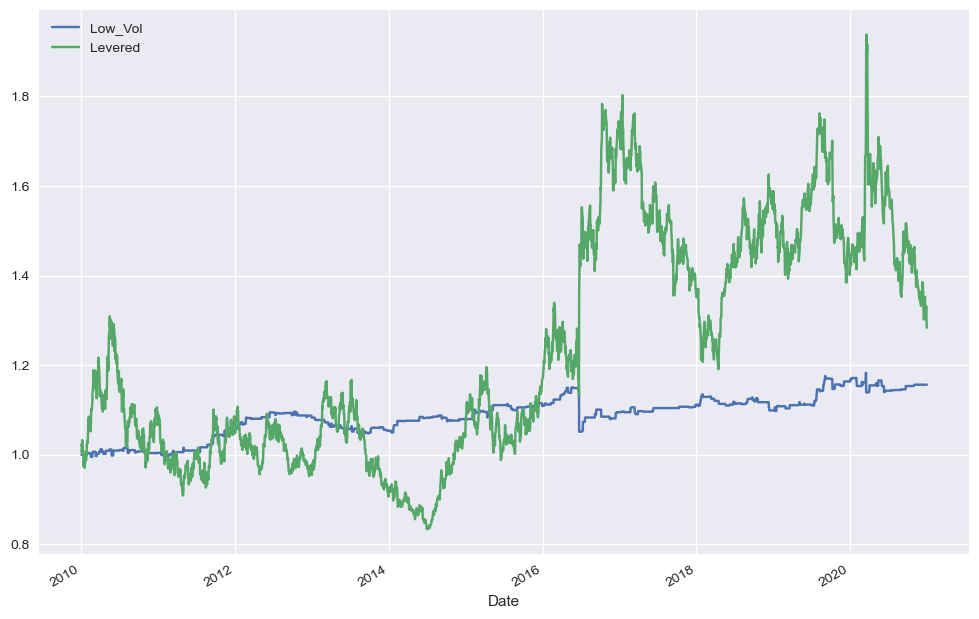

In [37]:
# Now compare between the low volatility and the levereged 
returns[["Low_Vol", "Levered"]].cumsum().apply(np.exp).plot(figsize = (12, 8))
plt.show()

# Levered => higher risk, higher return 
# Low_Vol => lower risk, lower return 

# For me, Low_Vol strategy are better. less risk, and still we got profit. 

__Which one would you (intuitively) prefer?__

__Low_Vol__, right? Let´s create a __risk-adjusted return metric__ that reflects/confirms this intuition!

---

# Mean Return (Reward)

In [9]:
returns

,GBP_USD,USD_GBP,Levered,Low_Vol,Random,Neutral
Date,,,,,,
2010-01-02,-0.002733,0.002733,0.006275,0.0,0.002733,0
2010-01-03,-0.001727,0.001727,0.003967,0.0,0.000000,0
2010-01-04,-0.005786,0.005786,0.013259,0.0,0.005786,0
2010-01-05,0.001687,-0.001687,-0.003884,0.0,0.001687,0
2010-01-06,-0.005446,0.005446,0.012482,0.0,0.005446,0
...,...,...,...,...,...,...
2020-12-23,0.005004,-0.005004,-0.011548,0.0,-0.005004,0
2020-12-27,-0.008278,0.008278,0.018937,0.0,-0.008278,0
2020-12-28,0.003799,-0.003799,-0.008760,0.0,-0.003799,0


__mean return__

In [10]:
returns.mean()

GBP_USD   -0.000053
USD_GBP    0.000053
Levered    0.000080
Low_Vol    0.000046
Random     0.000036
Neutral    0.000000
dtype: float64

__annualized mean return__

In [39]:
returns.index[-1] - returns.index[0]

Timedelta('4015 days 00:00:00')

In [38]:
# Compute the trading days in a year.
# its just the different between the start and end date, divide days of year.
td_year = returns.count() / ((returns.index[-1] - returns.index[0]).days / 365.25)
td_year

# by this calculation, in a year thare are 285 trading days..

GBP_USD    285.559091
USD_GBP    285.559091
Levered    285.559091
Low_Vol    285.559091
Random     285.559091
Neutral    285.559091
dtype: float64

In [12]:
# Compute the annualize mean return 
ann_mean = returns.mean() * td_year
ann_mean

GBP_USD   -0.015231
USD_GBP    0.015231
Levered    0.022704
Low_Vol    0.013213
Random     0.010229
Neutral    0.000000
dtype: float64

In [13]:
# CAGR - Compund annualize growth rate.  
np.exp(ann_mean) - 1 

GBP_USD   -0.015116
USD_GBP    0.015348
Levered    0.022964
Low_Vol    0.013300
Random     0.010281
Neutral    0.000000
dtype: float64

> Both the annualized mean return and the Compound Annual Growth Rate (CAGR) are measures used in finance to describe the performance of an investment over a specific period. However, they have different calculations and purposes.

__`Annualized Mean Return:`__
1. __Calculation__: The annualized mean return is calculated as the average return over a specified period, usually on an annual basis. It's the simple average of the periodic returns.
2. __Purpose__: It provides a straightforward measure of the average return per period. However, it does not consider the compounding effect, assuming a constant rate of return each period.

__`Compound Annual Growth Rate (CAGR)`:__
1. __Calculation__: CAGR is a measure of the geometric progression ratio that provides a constant rate of return over a specified time period. It is calculated using the formula:
2. __Purpose__: CAGR is particularly useful for measuring the geometric progression of an investment, accounting for compounding. It represents the constant rate at which an investment would need to grow from the beginning value to the ending value to achieve the same result.


__`Use Cases:`__
1. __Annualized Mean Return__ is often used for simplicity when describing the average return over discrete periods.
1. __CAGR__ is commonly used when investors want to understand the smoothed, compounded growth rate of an investment, especially when comparing investment performance over different time frames.

In [14]:
summary = pd.DataFrame(data = {"ann_mean":ann_mean})
summary

,ann_mean
GBP_USD,-0.015231
USD_GBP,0.015231
Levered,0.022704
Low_Vol,0.013213
Random,0.010229
Neutral,0.000000


In [15]:
summary.rank(ascending = False)

,ann_mean
GBP_USD,6.0
USD_GBP,2.0
Levered,1.0
Low_Vol,3.0
Random,4.0
Neutral,5.0


---

# Standard Deviation (Risk)

In [16]:
returns

,GBP_USD,USD_GBP,Levered,Low_Vol,Random,Neutral
Date,,,,,,
2010-01-02,-0.002733,0.002733,0.006275,0.0,0.002733,0
2010-01-03,-0.001727,0.001727,0.003967,0.0,0.000000,0
2010-01-04,-0.005786,0.005786,0.013259,0.0,0.005786,0
2010-01-05,0.001687,-0.001687,-0.003884,0.0,0.001687,0
2010-01-06,-0.005446,0.005446,0.012482,0.0,0.005446,0
...,...,...,...,...,...,...
2020-12-23,0.005004,-0.005004,-0.011548,0.0,-0.005004,0
2020-12-27,-0.008278,0.008278,0.018937,0.0,-0.008278,0
2020-12-28,0.003799,-0.003799,-0.008760,0.0,-0.003799,0


__Standard Deviation of Returns__

In [17]:
returns.std()

GBP_USD    0.005395
USD_GBP    0.005395
Levered    0.012358
Low_Vol    0.002383
Random     0.004614
Neutral    0.000000
dtype: float64

__Annualized Standard Deviation__

In [20]:
summary["ann_std"] = returns.std() * np.sqrt(td_year)

In [21]:
summary.sort_values(by = "ann_std")

,ann_mean,ann_std
Neutral,0.000000,0.000000
Low_Vol,0.013213,0.040267
Random,0.010229,0.077976
GBP_USD,-0.015231,0.091162
USD_GBP,0.015231,0.091162
Levered,0.022704,0.208838


- You can see that the __`Neutral`__ dont have a risk. 0 risk.
- But on the other hand, you can see that the __`Levered`__ have the higher std - higher risk. 

---

# Risk-adjusted Return ("Sharpe Ratio")

In [22]:
summary

,ann_mean,ann_std
GBP_USD,-0.015231,0.091162
USD_GBP,0.015231,0.091162
Levered,0.022704,0.208838
Low_Vol,0.013213,0.040267
Random,0.010229,0.077976
Neutral,0.000000,0.000000


__Graphical Solution__

> Let's plot the __`annualize risk`__ agains the __`annualize return`__.

- you can see that the __`Levereged`__, for example, have the higher risk, and also the higher return.
- the __`Nuetral`__ that's its literly nothing, have 0 return and 0 risk. 

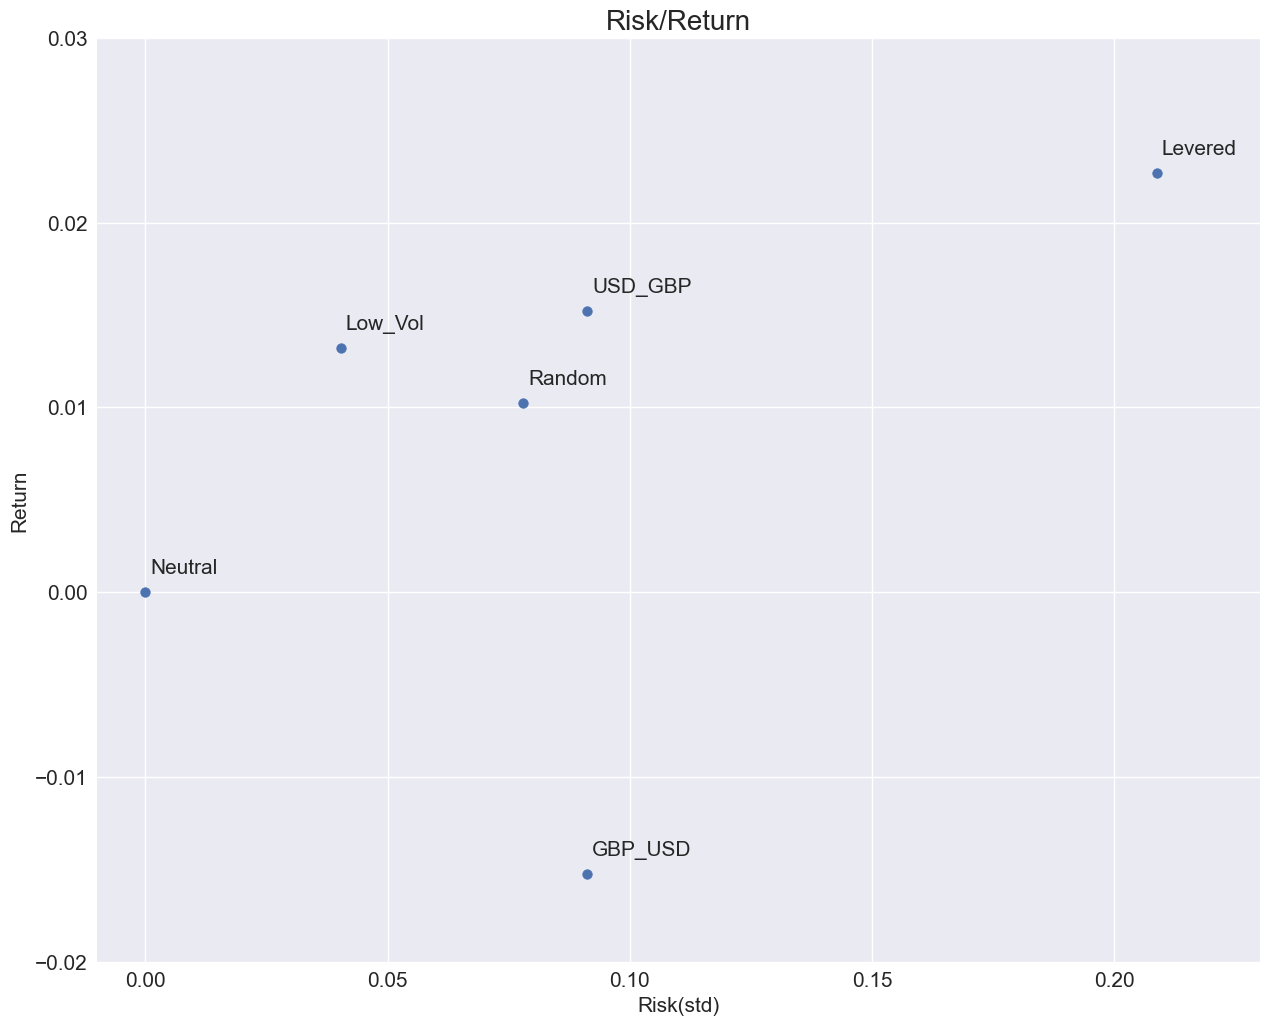

In [23]:
summary.plot(kind = "scatter", x = "ann_std", y = "ann_mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann_std"]+0.001, summary.loc[i, "ann_mean"]+0.001), size = 15)
plt.xlim(-0.01, 0.23)
plt.ylim(-0.02, 0.03)
plt.xlabel("Risk(std)", fontsize = 15)
plt.ylabel("Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

__Risk-adjusted Return Metric__ ("Sharpe Ratio light")

In [24]:
# risk free we set to 0. 
rf = 0 # simplification, don´t use this assumption for Portfolio Management!

In [25]:
# Compute the sharp ratio.
# its basicaly the:
# annualize mean return - risk free / annualize risk  
summary["Sharpe"] = (summary.ann_mean - rf) / summary.ann_std

# the higher Sharpe ratio - the better
# the lower Sharpe ratio - the worst

In [26]:
summary.sort_values(by = "Sharpe", ascending = False)


# Interpretation

# You can see that by the sharp ratio calculation:
# the BEST here is the Low_Vol, that hold the higher shrap ratio.

# Now, see the Levered. even its have the higher return, its shrap ratio is
# not good. and its implicit that the ratio between the the retuen and
# the risk can be better. 
# 
# So, Sharpe ratio -> reveal the optimal ratio between risk and return. 

,ann_mean,ann_std,Sharpe
Low_Vol,0.013213,0.040267,0.328121
USD_GBP,0.015231,0.091162,0.167078
Random,0.010229,0.077976,0.131181
Levered,0.022704,0.208838,0.108715
GBP_USD,-0.015231,0.091162,-0.167078
Neutral,0.000000,0.000000,NaN


In [27]:
# trading days per year. 
td_year

GBP_USD    285.559091
USD_GBP    285.559091
Levered    285.559091
Low_Vol    285.559091
Random     285.559091
Neutral    285.559091
dtype: float64

In [28]:
# alternative: annualizing daily sharpe ratio
# mean return / annualize risk
returns.mean() / returns.std() * np.sqrt(td_year) 

GBP_USD   -0.167078
USD_GBP    0.167078
Levered    0.108715
Low_Vol    0.328121
Random     0.131181
Neutral         NaN
dtype: float64

---

# Putting everything together

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [41]:
returns = pd.read_csv("../Data/returns.csv", index_col = "Date", parse_dates = ["Date"])
returns

,GBP_USD,USD_GBP,Levered,Low_Vol,Random,Neutral
Date,,,,,,
2010-01-02,-0.002733,0.002733,0.006275,0.0,0.002733,0
2010-01-03,-0.001727,0.001727,0.003967,0.0,0.000000,0
2010-01-04,-0.005786,0.005786,0.013259,0.0,0.005786,0
2010-01-05,0.001687,-0.001687,-0.003884,0.0,0.001687,0
2010-01-06,-0.005446,0.005446,0.012482,0.0,0.005446,0
...,...,...,...,...,...,...
2020-12-23,0.005004,-0.005004,-0.011548,0.0,-0.005004,0
2020-12-27,-0.008278,0.008278,0.018937,0.0,-0.008278,0
2020-12-28,0.003799,-0.003799,-0.008760,0.0,-0.003799,0


In [42]:
# A function foe calculate the sharp ratio. 
def sharpe(series, rf = 0):
    if series.std() == 0:
        return np.nan
    else:
        #            mean return     /                              annualize risk                         
        return (series.mean() - rf) / series.std() * np.sqrt(series.count() / ((series.index[-1] - series.index[0]).days / 365.25))

In [43]:
returns.apply(sharpe, rf = 0)

GBP_USD   -0.167078
USD_GBP    0.167078
Levered    0.108715
Low_Vol    0.328121
Random     0.131181
Neutral         NaN
dtype: float64

In [44]:
sharpe(series = returns.Levered, rf = 0)

0.10871510012958406